Análise de série temporal de uma estação metereológica situada em Petrolina-PE, realizada para disciplina de radiação solar do Centro de Energia Renováveis (2020.3).

Leonardo T. Peregrino

leonardo.peregrino@ufpe.br


# Introdução

O problema consiste na validação de um log de dados ambientais de uma estação situada em Petrolina. Como os dados correspondem a mais de 10 anos, uma simples planilha não seria eficiente (O excel suporta apenas ~1Mi de linhas). 

Foi selecionada a linguagem python, onde podemos usar a biblioteca pandas para análise de dados.

In [1]:
# importando a biblioteca com prefixo pd
import pandas as pd

Assumindo que estamos no diretório do log, podemos ler o csv com a função `pd.read_csv()`. Atenção para não rodar a leitura múltiplas vezes, visto que o arquivo é grande e será carregado em memória.

In [2]:
csv = pd.read_csv('Petrolina.csv')

In [3]:
# O objeto criado é um dataframe, semelhante a uma planilha.
type(csv)

pandas.core.frame.DataFrame

# Visualizando a estrutura dos dados

a biblioteca `pandas` é bastante versátil, permitindo rápidas análises. 
Podemos ver _head_ e _tail_ do _dataframe_ apenas lendo o objeto. 
Isso já nos permite entender com o que estamos lidando.

In [4]:
print(f'O log possui {csv.shape[0]:,} linhas e {csv.shape[1]:,} colunas')

csv

O log possui 5,785,920 linhas e 13 colunas


,Date,GHI,DNI,DHI,lw,par,lux,tp_sfc,humid,press,rain,ws_10m,wd_10m
0,31-Dec-2006 21:00:00,-2.343,-4.541,-1.498,376.8,0.000,0.000,28.87,41.08,969.08,0.0,-0.012,97.5
1,31-Dec-2006 21:01:00,-2.335,-4.603,-1.470,376.9,0.000,0.000,28.62,41.14,969.14,0.0,-0.012,97.4
2,31-Dec-2006 21:02:00,-2.365,-4.954,-1.375,375.0,0.000,0.000,28.25,42.09,969.14,0.0,-0.012,97.5
3,31-Dec-2006 21:03:00,-2.394,-4.958,-1.136,376.6,0.000,0.000,28.25,42.23,969.14,0.0,-0.012,97.4
4,31-Dec-2006 21:04:00,-2.387,-4.958,-1.103,376.1,0.000,0.000,28.39,42.00,969.14,0.0,-0.012,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785915,31-Dec-2017 20:55:00,-1.945,-0.205,-2.350,398.7,-0.025,-0.004,30.13,37.24,966.73,0.0,0.596,74.6
5785916,31-Dec-2017 20:56:00,-1.942,-0.205,-2.321,398.1,-0.008,-0.004,30.17,37.31,966.73,0.0,0.619,74.6
5785917,31-Dec-2017 20:57:00,-1.948,-0.205,-2.306,397.2,-0.036,-0.004,30.10,37.24,966.79,0.0,0.522,74.7
5785918,31-Dec-2017 20:58:00,-1.942,-0.205,-2.309,396.6,-0.025,-0.004,30.12,37.31,966.79,0.0,0.569,74.7


já podemos ver que colunas como **GHI, DNI** e **DHI** possuem valores negativos, o que é fisicamente impossível. Provavelmente o datalogger capturou valores noturnos.

Outro problema é o formato da coluna Date que está como _string_. Convertê-la para objeto _datetime_ facilita muito durante análises de séries temporais.

In [5]:
type(csv['Date'][0])

str

In [6]:
# discriminar o formato da coluna previamente aumenta massivamente
# o tempo de processamento, não fazer é uma má prática

csv['Date'] = pd.to_datetime(csv['Date'], format="%d-%b-%Y %H:%M:%S")

In [7]:
type(csv['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Outra melhoria em séries temporais é [usar um índice de datas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#indexing).

In [8]:
csv.set_index('Date', inplace = True)

In [9]:
# agora não temos mais o índice numérico
csv

,GHI,DNI,DHI,lw,par,lux,tp_sfc,humid,press,rain,ws_10m,wd_10m
Date,,,,,,,,,,,,
2006-12-31 21:00:00,-2.343,-4.541,-1.498,376.8,0.000,0.000,28.87,41.08,969.08,0.0,-0.012,97.5
2006-12-31 21:01:00,-2.335,-4.603,-1.470,376.9,0.000,0.000,28.62,41.14,969.14,0.0,-0.012,97.4
2006-12-31 21:02:00,-2.365,-4.954,-1.375,375.0,0.000,0.000,28.25,42.09,969.14,0.0,-0.012,97.5
2006-12-31 21:03:00,-2.394,-4.958,-1.136,376.6,0.000,0.000,28.25,42.23,969.14,0.0,-0.012,97.4
2006-12-31 21:04:00,-2.387,-4.958,-1.103,376.1,0.000,0.000,28.39,42.00,969.14,0.0,-0.012,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 20:55:00,-1.945,-0.205,-2.350,398.7,-0.025,-0.004,30.13,37.24,966.73,0.0,0.596,74.6
2017-12-31 20:56:00,-1.942,-0.205,-2.321,398.1,-0.008,-0.004,30.17,37.31,966.73,0.0,0.619,74.6
2017-12-31 20:57:00,-1.948,-0.205,-2.306,397.2,-0.036,-0.004,30.10,37.24,966.79,0.0,0.522,74.7


## Extremos
ver os extremos dos dados pode ajudar em reconhecer _outliers_

In [10]:
csv.nlargest(10, 'GHI')

,GHI,DNI,DHI,lw,par,lux,tp_sfc,humid,press,rain,ws_10m,wd_10m
Date,,,,,,,,,,,,
2007-02-20 10:25:00,1563.0,4.254,674.9,359.8,3647.0,188.4,25.39,71.80,970.45,0.0,3.354,326.2
2016-12-16 12:15:00,1502.0,850.000,687.0,410.8,3162.0,153.0,28.55,52.91,971.93,0.0,6.985,99.6
2010-02-28 11:46:00,1488.0,7.950,1557.0,431.0,3481.0,176.7,33.34,45.49,969.74,0.0,2.764,107.4
2017-01-25 11:57:00,1482.0,866.000,615.3,433.3,3071.0,147.5,32.46,38.03,970.75,0.0,4.436,125.5
2010-02-28 11:13:00,1473.0,7.790,1540.0,437.0,3435.0,174.5,33.49,43.59,970.19,0.0,1.928,73.0
2016-02-20 12:04:00,1473.0,591.600,610.5,428.7,2990.0,151.4,30.95,56.42,970.98,0.0,3.113,120.0
2017-10-11 11:16:00,1467.0,935.000,534.3,409.6,3096.0,154.3,29.18,41.51,970.47,0.0,5.046,95.8
2017-11-07 10:53:00,1460.0,NaN,NaN,423.1,3180.0,153.2,30.95,44.86,968.00,0.0,3.928,110.9
2011-11-06 12:07:00,1459.0,854.000,625.1,423.2,3340.0,169.7,30.10,42.61,969.98,0.0,3.550,142.0


In [11]:
csv.nsmallest(10, 'GHI')

,GHI,DNI,DHI,lw,par,lux,tp_sfc,humid,press,rain,ws_10m,wd_10m
Date,,,,,,,,,,,,
2008-12-03 01:40:00,-6999.00,0.207,-0.161,414.6,0.000,0.000,21.87,90.70,967.00,0.0,0.972,37.58
2012-11-29 18:27:00,-12.52,-17.210,-5.416,456.7,-0.005,-0.016,29.61,49.26,964.98,0.0,2.248,59.57
2012-11-29 18:26:00,-11.90,-18.740,-4.271,459.2,-0.020,-0.018,29.84,50.94,964.98,0.0,1.398,55.15
2012-03-06 19:31:00,-11.58,-25.560,-3.311,448.3,-0.282,0.000,26.75,51.31,967.40,0.0,3.078,129.50
2008-01-01 18:54:00,-11.20,-36.180,0.723,429.5,-0.307,-0.004,28.71,48.25,965.06,0.0,2.821,42.05
2012-03-06 19:32:00,-10.97,-25.030,-4.119,444.9,-0.161,0.000,26.27,50.79,967.40,0.0,2.827,130.10
2007-11-23 18:00:00,-10.94,-29.720,-2.379,451.3,-0.302,0.004,29.11,52.62,966.73,0.0,4.303,121.20
2013-12-05 20:52:00,-10.81,-26.620,0.000,459.5,-0.303,0.013,29.46,44.76,965.92,0.0,4.608,33.70
2012-11-29 18:28:00,-10.73,-13.210,-5.995,454.8,0.000,-0.016,29.34,52.87,964.98,0.0,2.658,62.19


# Caracterização

Por padrão, tem-se o seguinte modelo para avaliar os dados ruins de nosso log:

|#|flag|significado|exemplo|
|:---|:---|:---|---:|
|1|bom| foi aprovado em todos os testes |ideal|
|2|suspeito| teste não permite concluir se é correto ou é um outlier||
|3|anômalo| não será avaliado em nenhum dos testes posteriores||
|4|previamente anômalo| teste anterior caracterizou-o como anômalo||
|5|dado não testado| não será avaliado em qualquer teste do procedimento.| dados noturnos|
|6|dado não disponível| não foi registrado pelo sistema de aquisição de dados| NaN|

## Testes de Lacunas

- [ ] Descontinuidade
- [ ] Missing data
- [ ] Duplicidade de datas
- [ ] Lacunas

In [12]:
# resetar o índice para poder diferenciar os timestamps
# e depois agrupar-los
csv.reset_index().diff()

,Date,GHI,DNI,DHI,lw,par,lux,tp_sfc,humid,press,rain,ws_10m,wd_10m
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0 days 00:01:00,0.008,-0.062,0.028,0.1,0.000,0.000,-0.25,0.06,0.06,0.0,0.000,-0.1
2,0 days 00:01:00,-0.030,-0.351,0.095,-1.9,0.000,0.000,-0.37,0.95,0.00,0.0,0.000,0.1
3,0 days 00:01:00,-0.029,-0.004,0.239,1.6,0.000,0.000,0.00,0.14,0.00,0.0,0.000,-0.1
4,0 days 00:01:00,0.007,0.000,0.033,-0.5,0.000,0.000,0.14,-0.23,0.00,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785915,0 days 00:01:00,0.000,0.000,0.015,-0.2,-0.014,0.001,-0.01,-0.10,-0.06,0.0,-0.053,0.0
5785916,0 days 00:01:00,0.003,0.000,0.029,-0.6,0.017,0.000,0.04,0.07,0.00,0.0,0.023,0.0
5785917,0 days 00:01:00,-0.006,0.000,0.015,-0.9,-0.028,0.000,-0.07,-0.07,0.06,0.0,-0.097,0.1
5785918,0 days 00:01:00,0.006,0.000,-0.003,-0.6,0.011,0.000,0.02,0.07,0.00,0.0,0.047,0.0


In [13]:
csv.reset_index().diff().groupby('Date').count()

,GHI,DNI,DHI,lw,par,lux,tp_sfc,humid,press,rain,ws_10m,wd_10m
Date,,,,,,,,,,,,
0 days 00:01:00,5306259,5296773,5291313,5342054,5105075,5342066,5359191,5359186,5359192,5359201,5359195,5359201


Como em toda série temporal só temos intervalos de 1 minuto, conclui-se que não há descontinuidadem duplicidade ou lacunas.
- [x] Descontinuidade
- [ ] Missing data
- [x] Duplicidade de datas
- [x] Lacunas

In [14]:
qtdNan = csv['GHI'].isna().sum()

print(f'são {qtdNan:,} dados GHI ausentes que representam',
      f'cerca de {qtdNan/len(csv)*100:.3}% do total')

csv[csv['GHI'].isnull()]

são 471,769 dados GHI ausentes que representam cerca de 8.15% do total


,GHI,DNI,DHI,lw,par,lux,tp_sfc,humid,press,rain,ws_10m,wd_10m
Date,,,,,,,,,,,,
2007-01-30 20:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-23 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13 07:39:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13 07:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13 07:41:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-24 10:44:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-24 10:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-24 10:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
csv['NaN'] = csv['GHI'].isna()

In [16]:
csv

,GHI,DNI,DHI,lw,par,lux,tp_sfc,humid,press,rain,ws_10m,wd_10m,NaN
Date,,,,,,,,,,,,,
2006-12-31 21:00:00,-2.343,-4.541,-1.498,376.8,0.000,0.000,28.87,41.08,969.08,0.0,-0.012,97.5,False
2006-12-31 21:01:00,-2.335,-4.603,-1.470,376.9,0.000,0.000,28.62,41.14,969.14,0.0,-0.012,97.4,False
2006-12-31 21:02:00,-2.365,-4.954,-1.375,375.0,0.000,0.000,28.25,42.09,969.14,0.0,-0.012,97.5,False
2006-12-31 21:03:00,-2.394,-4.958,-1.136,376.6,0.000,0.000,28.25,42.23,969.14,0.0,-0.012,97.4,False
2006-12-31 21:04:00,-2.387,-4.958,-1.103,376.1,0.000,0.000,28.39,42.00,969.14,0.0,-0.012,97.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 20:55:00,-1.945,-0.205,-2.350,398.7,-0.025,-0.004,30.13,37.24,966.73,0.0,0.596,74.6,False
2017-12-31 20:56:00,-1.942,-0.205,-2.321,398.1,-0.008,-0.004,30.17,37.31,966.73,0.0,0.619,74.6,False
2017-12-31 20:57:00,-1.948,-0.205,-2.306,397.2,-0.036,-0.004,30.10,37.24,966.79,0.0,0.522,74.7,False


- [x] Descontinuidade
- [x] Missing data
- [x] Duplicidade de datas
- [x] Lacunas

In [17]:
negativos = csv['GHI'] < 0
qtdNegativos = csv[negativos]['GHI'].count()

print(f'são {qtdNegativos:,} dados GHI negativos que representam',
      f'cerca de {qtdNegativos/len(csv)*100:.4}% do total')

csv[negativos]

são 2,584,464 dados GHI negativos que representam cerca de 44.67% do total


,GHI,DNI,DHI,lw,par,lux,tp_sfc,humid,press,rain,ws_10m,wd_10m,NaN
Date,,,,,,,,,,,,,
2006-12-31 21:00:00,-2.343,-4.541,-1.498,376.8,0.000,0.000,28.87,41.08,969.08,0.0,-0.012,97.5,False
2006-12-31 21:01:00,-2.335,-4.603,-1.470,376.9,0.000,0.000,28.62,41.14,969.14,0.0,-0.012,97.4,False
2006-12-31 21:02:00,-2.365,-4.954,-1.375,375.0,0.000,0.000,28.25,42.09,969.14,0.0,-0.012,97.5,False
2006-12-31 21:03:00,-2.394,-4.958,-1.136,376.6,0.000,0.000,28.25,42.23,969.14,0.0,-0.012,97.4,False
2006-12-31 21:04:00,-2.387,-4.958,-1.103,376.1,0.000,0.000,28.39,42.00,969.14,0.0,-0.012,97.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 20:55:00,-1.945,-0.205,-2.350,398.7,-0.025,-0.004,30.13,37.24,966.73,0.0,0.596,74.6,False
2017-12-31 20:56:00,-1.942,-0.205,-2.321,398.1,-0.008,-0.004,30.17,37.31,966.73,0.0,0.619,74.6,False
2017-12-31 20:57:00,-1.948,-0.205,-2.306,397.2,-0.036,-0.004,30.10,37.24,966.79,0.0,0.522,74.7,False


In [18]:
print(f"Ao todo, já podemos ver a presença de {qtdNan + qtdNegativos:,}",
      " dados sem utilidade na avaliação do recurso solar,",  
      f"representando {(qtdNan + qtdNegativos) * 100 / csv.shape[0]:.3}% do total.")

Ao todo, já podemos ver a presença de 3,056,233  dados sem utilidade na avaliação do recurso solar, representando 52.8% do total.


# Limpando e visualizando

<AxesSubplot:title={'center':'GHI'}, xlabel='ano'>

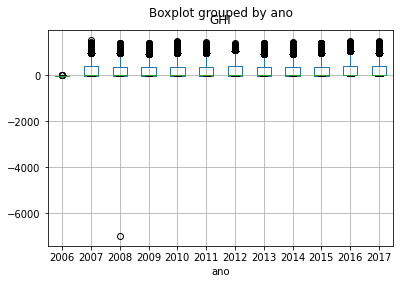

In [19]:
# criar uma coluna com o ano de cada timestamp
# para poder ver o boxplot de cada ano

csv['ano'] = csv.index.year
csv.boxplot(by='ano', column='GHI')

Apesar de ser possível visualizar, os dados estão mal representados por causa de _bad data_. Deve-se avaliar depois de limpar.

In [20]:
# limpar os valores negativos

csv.drop(csv[csv['GHI'] < 0].index, inplace=True)

# limpar NaN's

csv.dropna(subset=['GHI'], inplace=True)

<AxesSubplot:title={'center':'GHI'}, xlabel='ano'>

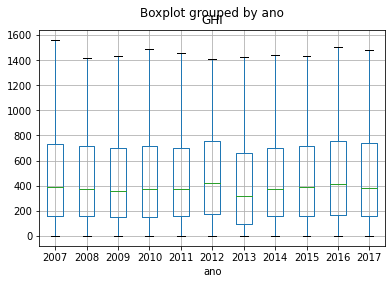

In [21]:
# novamente
csv.boxplot(by='ano', column='GHI')

In [22]:
print(f'no momento, tem-se {len(csv)/5_785_920*100:.4}% dos dados iniciais')

no momento, tem-se 47.18% dos dados iniciais


### Testes Locais

In [23]:
import solar

Para a análise de _Tracker off_ é necessário avaliar o valor de $\cos\theta$, desconsiderando a seguinte situação:

$$\frac{I_d + I_n*\cos\theta}{I_g} > 0.85$$

In [24]:
# criar nova coluna de datas, nomeada cos_theta
csv['cos_theta'] = csv.index

# aplicar cos_theta nela
csv['cos_theta'] = csv['cos_theta'].apply(solar.cos_theta)

In [25]:
csv['Tracker'] = (csv['DHI'] + csv['DNI'] * csv['cos_theta']) / csv['GHI']

In [26]:
csv

,GHI,DNI,DHI,lw,par,lux,tp_sfc,humid,press,rain,ws_10m,wd_10m,NaN,ano,cos_theta,Tracker
Date,,,,,,,,,,,,,,,,
2007-01-01 05:20:00,0.223,-2.066,0.576,358.4,5.046,0.235,22.58,67.11,971.55,0.0,0.750,134.3,False,2007,0.194703,0.779119
2007-01-01 05:21:00,0.527,-2.066,0.904,357.4,5.863,0.275,22.52,67.51,971.55,0.0,0.884,129.1,False,2007,0.197746,0.940145
2007-01-01 05:22:00,0.935,-2.066,1.274,357.1,6.912,0.325,22.52,67.31,971.55,0.0,1.193,132.0,False,2007,0.200790,0.918895
2007-01-01 05:23:00,1.337,-2.066,1.678,357.8,8.000,0.380,22.45,67.67,971.55,0.0,1.161,130.7,False,2007,0.203836,0.940072
2007-01-01 05:24:00,1.693,-2.066,2.040,358.2,9.150,0.436,22.43,67.74,971.61,0.0,1.415,134.0,False,2007,0.206882,0.952500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 18:05:00,2.166,0.561,1.752,409.4,11.990,0.510,35.16,26.53,965.07,0.0,1.952,111.8,False,2017,0.177692,0.854887
2017-12-31 18:06:00,1.579,0.277,1.171,408.8,10.320,0.437,35.12,26.66,965.07,0.0,2.760,108.9,False,2017,0.174659,0.772249
2017-12-31 18:07:00,1.080,0.205,0.671,408.7,8.810,0.370,34.99,26.83,965.07,0.0,2.309,110.3,False,2017,0.171628,0.653874


In [35]:
csv.drop(index=csv[csv['Tracker'] > 0.85].index, inplace=True)

<AxesSubplot:title={'center':'GHI'}, xlabel='ano'>

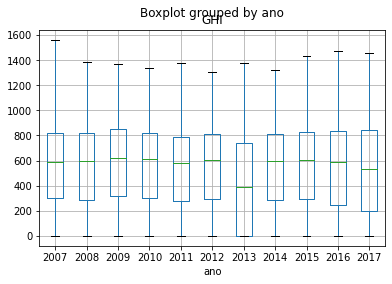

In [37]:
csv.boxplot(by='ano', column='GHI')

In [38]:
csv

,GHI,DNI,DHI,lw,par,lux,tp_sfc,humid,press,rain,ws_10m,wd_10m,NaN,ano,cos_theta,Tracker
Date,,,,,,,,,,,,,,,,
2007-01-01 05:20:00,0.223,-2.066,0.576,358.4,5.046,0.235,22.58,67.11,971.55,0.0,0.750,134.3,False,2007,0.194703,0.779119
2007-01-01 05:40:00,20.920,-0.496,17.270,358.3,48.130,2.367,22.55,67.70,971.73,0.0,1.547,151.7,False,2007,0.255703,0.819463
2007-01-01 05:41:00,24.520,-0.227,19.020,361.9,52.910,2.599,22.56,67.64,971.79,0.0,1.283,152.9,False,2007,0.258756,0.773298
2007-01-01 05:42:00,26.670,0.069,20.090,360.3,56.770,2.790,22.54,67.74,971.79,0.0,1.906,146.0,False,2007,0.261809,0.753958
2007-01-01 05:43:00,28.820,0.392,21.050,360.2,60.680,2.990,22.56,67.61,971.79,0.0,1.281,143.4,False,2007,0.264863,0.733998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 05:23:00,2.429,-0.034,2.057,382.9,7.830,0.329,25.28,64.57,969.09,0.0,2.327,137.4,False,2017,0.203725,0.843999
2017-12-31 18:06:00,1.579,0.277,1.171,408.8,10.320,0.437,35.12,26.66,965.07,0.0,2.760,108.9,False,2017,0.174659,0.772249
2017-12-31 18:07:00,1.080,0.205,0.671,408.7,8.810,0.370,34.99,26.83,965.07,0.0,2.309,110.3,False,2017,0.171628,0.653874


# Conclusão

A tratativa de dados aqui feita foi apenas preliminar, não se limitando a este notebook. Entretanto, a análise revela falhas importantes que "sujam" o dataset, como valores negativos, _NaN_'s, _outliers_ e outros fisicamente impossíveis. 

Para uma série solarimétrica em Petrolina, é esperado que em torno da metade seja ruído. Apesar do dataset ser composto inicialmente de mais de 5 milhões de entradas, ao analisar o recurso solar termina-se com menos de 20%.

Foi mostrado como os dados crus, dificultam a extração de fenômenos ou até mesmo descaracterizam completamente, como visto no primeiro boxplot. A análise ressalta a importância de limpeza preliminar para que qualquer informação seja interpretada.

_All models are wrong, but some are useful._

George Box